## Mapeamento de regiões com padroes semelhantes de ocorrencias de raios

In [1]:
# coding = UTF-8
import shapefile as shp  # Requires the pyshp package
from mpl_toolkits.basemap import Basemap  
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

In [2]:
df_raios= pd.read_csv('./dados/ts_qtd-raios-mes.csv', sep = ';', index_col=[0,1,2])

df_raios.head()

,,,3,4,5,6,7,8,9,10,11,12,...,29,30,31,32,33,34,35,36,37,38
0,1,2,,,,,,,,,,,,,,,,,,,,,
1526,-62.25,5.75,16,2217,558,47,6,87,63,556,354,927,...,1053,64,6,92,651,787,558,864,1595,790
1527,-61.75,5.75,24,1263,469,31,9,101,45,501,402,893,...,1098,43,2,133,396,556,449,995,1251,1102
1528,-61.25,5.75,12,754,207,21,6,45,36,207,146,366,...,600,23,0,11,94,268,213,472,729,370
1529,-60.75,5.75,10,454,170,16,7,15,24,145,73,793,...,427,9,1,10,45,225,157,319,894,408
1530,-60.25,5.75,14,468,158,44,11,17,33,122,128,769,...,464,11,1,10,98,226,166,636,817,755


In [3]:

#finding the number of seeds(clusters) for kmeans method
class number_of_clusters:

    def __init__(self, X):

        self.X = X

    def elbow(self):
        wcss = [] #Within Cluster Sum of Squares
        for i in range(1, 16):
            kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=None)
            kmeans.fit(self.X)
            wcss.append(kmeans.inertia_)

        plt.plot(range(1, 16), wcss)
        plt.plot(range(1, 16), wcss, 'o', c='red', linewidth=2)
        plt.title('The elbow method')
        plt.xlabel('Number of clusters')
        plt.ylabel('WCSS')
        #plt.savefig('/home/archbolt/Desktop/outputs/data_in_columns/Elbow_Euclidean.png', bbox_inches='tight') # saving figure
        
        return plt.show()

    def tree(self):
        plt.figure(figsize=(15, 10))  
        plt.title("Customer Dendograms") 

        dend = shc.dendrogram(shc.linkage(self.X, method='ward', metric='euclidean'), truncate_mode='level', p=3)
        #plt.savefig('/home/archbolt/Desktop/outputs/n_clusters/Dendograms.png', bbox_inches='tight') # saving figure

        return plt.show()
    

    
class clustering:

    def __init__(self, data):
        
        self.data = data

    def kmeans(self, n_clusters):

        kmeans = KMeans(n_clusters=n_clusters,init='k-means++', max_iter=300, n_init=10, random_state=None)
        y_kmeans = kmeans.fit(self.data)
        
        return y_kmeans, kmeans.cluster_centers_
        


    def hierarquico(self, n_clusters):

        # setting distance_threshold=0 ensures we compute the full tree.
        hier = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
        hier = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward', compute_full_tree='auto')
        hier_pred = hier.fit(x_normalized)


    def plot_ts(self,k ,cnts, y_pred):
        plt.figure(figsize=(15, 10))
        #ploting
        for i in range(k):
            plt.subplot(k,1,i+1)
            for series in self.data[y_pred==i]:
                plt.plot(series.ravel(), color='b', linewidth=0.1)
                plt.plot(cnts[i].ravel(), "r-", linewidth=1)
                if i == 0:
                    plt.title("Euclidean $k$-means")
                    
        return plt.show()
                    
    def plot_mapclusters(self, x, pathshape, y_pred):

        extent = [-80.0, -20.0, -40.0, 8.0]

        fig, ax = plt.subplots(figsize=(7, 5))
        ax = Basemap(llcrnrlon=extent[0], llcrnrlat=extent[1], urcrnrlon=extent[2], urcrnrlat=extent[3], epsg=4326, ax=ax)
        #ax.drawmapboundary(fill_color='aqua')
        ax.readshapefile(pathshape,'BRA',color='k', linewidth=0.75)

        colors = ['b', 'gray', 'orange', 'c', 'g', 'y']#, 'lightgreen', 'lightblue', 'r', 'yellow'] 
        labset = [('b','A'), ('gray', 'B'), ('orange', 'C'), ('c', 'D'), ('g', 'E'),('y', 'F')]#,('lightgreen', 'G'), ('lightblue', 'H'), ('r', 'I'), ('yellow', 'J')]
        for c,l in labset:
            plt.scatter(x[:,1], x[:,2], c=y_pred.labels_, cmap=matplotlib.colors.ListedColormap(colors), s=100)
            plt.scatter([], [], c=c, label = l, s=30)

        #matplotlib.rcParams.update({'font.size': 15})
        plt.xlabel('Longitude', size=12)
        plt.ylabel('Latitude', size=12)
        plt.title('Clusters by Occurrences of Lightning')
        #add a legend
        plt.legend(title= 'Regions', loc='upper left')
        
        return plt.show()

In [4]:
dataset = df_raios.iloc[:,:].values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(dataset)

print('original data\n')
print(dataset[0:9,0:11])
print('\nDados Normalizados\n')
print(x_scaled[0:9,0:11])

original data

[[  16 2217  558   47    6   87   63  556  354  927 1741]
 [  24 1263  469   31    9  101   45  501  402  893 1265]
 [  12  754  207   21    6   45   36  207  146  366  769]
 [  10  454  170   16    7   15   24  145   73  793  888]
 [  14  468  158   44   11   17   33  122  128  769 1118]
 [  19  435  566  105   14   34   89  240  420  716 2576]
 [  45  969  983  133   12   66  124  608  447  799 2240]
 [  29  676 1244   77    5   46   68  695  571  702 1836]
 [  15 1133  657   75    5   34   34  549  544 1024 2183]]

Dados Normalizados

[[0.00038947 0.07233652 0.01340658 0.00146418 0.00026013 0.00355718
  0.00298368 0.01403013 0.03244432 0.1318822  0.09843944]
 [0.00062914 0.04108243 0.01125281 0.00089279 0.00041621 0.0041645
  0.00193061 0.01264226 0.03684355 0.1270451  0.0715255 ]
 [0.00026963 0.02440702 0.00491252 0.00053568 0.00026013 0.00173521
  0.00140408 0.00522345 0.01338099 0.05207    0.04348072]
 [0.00020971 0.01457869 0.00401713 0.00035712 0.00031216 0.00043

In [5]:
km = clustering(x_scaled) 

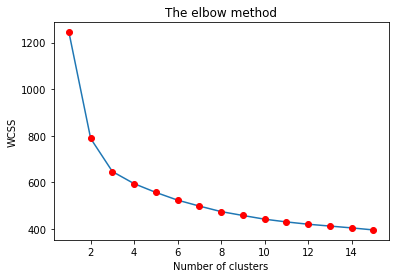

In [6]:
k = number_of_clusters(x_scaled)
k.elbow()

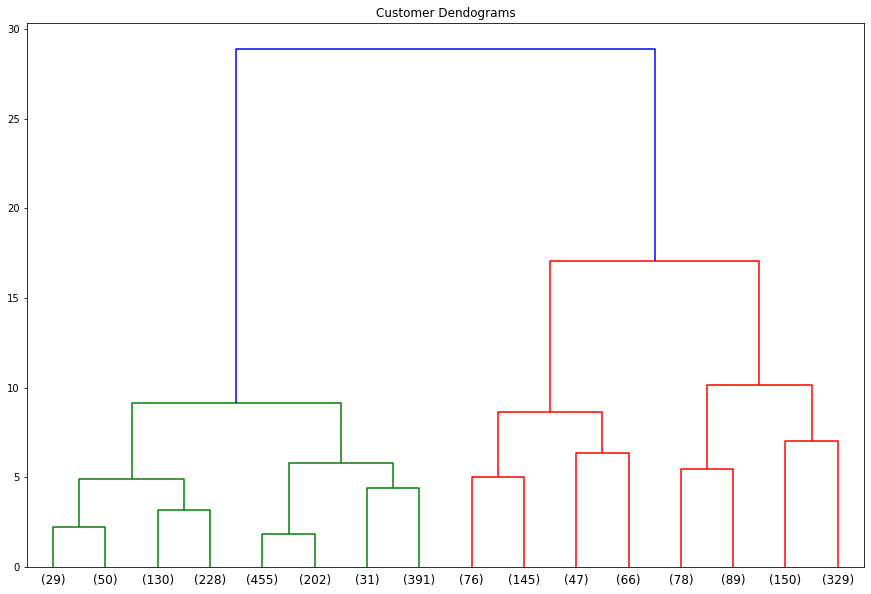

In [7]:
k.tree()

In [8]:
n=6        
y_pred, cnts = km.kmeans(n)
print(list(set(y_pred.labels_)))

[0, 1, 2, 3, 4, 5]


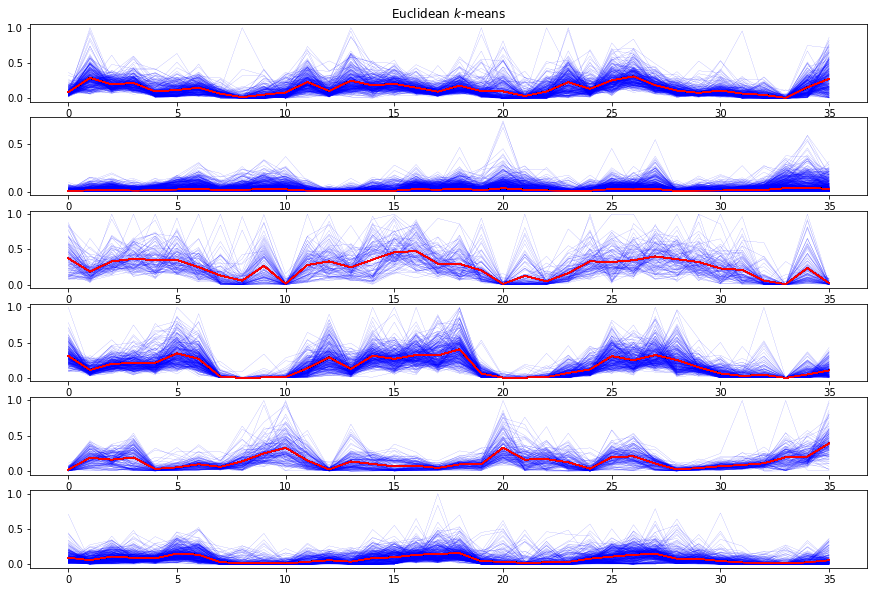

In [9]:
km.plot_ts(n, cnts, y_pred.labels_)

In [10]:
df_raios.insert(loc=0, column='cluster', value=y_pred.labels_)
df_raios.reset_index(inplace=True)
df_raios.head()

,0,1,2,cluster,3,4,5,6,7,8,...,29,30,31,32,33,34,35,36,37,38
0,1526,-62.25,5.75,1,16,2217,558,47,6,87,...,1053,64,6,92,651,787,558,864,1595,790
1,1527,-61.75,5.75,1,24,1263,469,31,9,101,...,1098,43,2,133,396,556,449,995,1251,1102
2,1528,-61.25,5.75,1,12,754,207,21,6,45,...,600,23,0,11,94,268,213,472,729,370
3,1529,-60.75,5.75,1,10,454,170,16,7,15,...,427,9,1,10,45,225,157,319,894,408
4,1530,-60.25,5.75,1,14,468,158,44,11,17,...,464,11,1,10,98,226,166,636,817,755


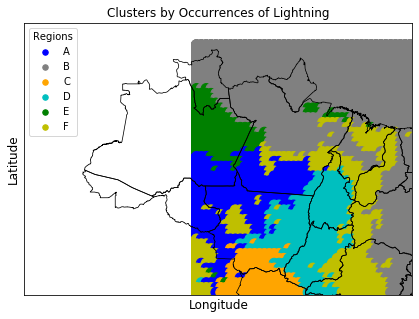

In [11]:
x = df_raios.iloc[:, :].values
pathshape = './Shapefiles/BRA'
km.plot_mapclusters(x,pathshape,y_pred)